<a href="https://colab.research.google.com/github/Husayn01/Academic-Research/blob/main/Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
train_raw = pd.read_csv('/content/drive/My Drive/Academic_Research/Data/train.csv', sep=';')
test_raw = pd.read_csv('/content/drive/My Drive/Academic_Research/Data/test.csv', sep=';')

In [61]:
test_raw.head(5)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,37.304054,NaN,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,37.864922,NaN,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN


In [62]:
train_raw.shape

(1170511, 29)

In [63]:
train_raw.head(5)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [64]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [65]:
train_raw.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


The data contains the metadata columns
* WELL: well name
* DEPTH_MD: measured depth
* X_LOC: UTM X coordinate
* Y_LOC: UTM Y coordinate
* Z_LOC: DEPTH
* GROUP: NPD lithostratigraphy group
* FORMATION: NPD lithostratgraphy formation

The data contains the well log curves. For example the following:
* BS: Bit Size
* CALI: Caliper
* RDEP: Deep Resistivity
* RHOB: Bulk Density
* GR: Raw gamma data
* SGR: Spectral Gamma Ray
* RMED: Medium Resistivity
* ROP: Rate of Penetration
* NPHI: Neutron Porosity
* PEF: Photoelectric Absorption Factor
* RSHA: Shallow Resistivity
* DTS: Sonic (Sheer Slowness)
* DTC: Sonic (Compressional Slowness)

See contest page for full list.

as well as the interpretation

* FORCE_2020_LITHOFACIES_LITHOLOGY: lithology class label
* FORCE_2020_LITHOFACIES_CONFIDENCE: confidence in lithology interpretation (1: high, 2: medium, 3: low)

There is a total of 98 wells in the training dataset. The `WELL` column is included so the data can be separated per well. This will be necessary for any "windowed" approaches where we use non-local information in the ML features.

In [66]:
wells = train_raw['WELL'].unique()
wells

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

In [67]:
len(wells)

98

The LITHOLOGY column contains the interpretation. Each number corresponds to a lithology class, given by the following list:

In [68]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [69]:
train_raw['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000, 70032,
       90000, 88000, 93000])

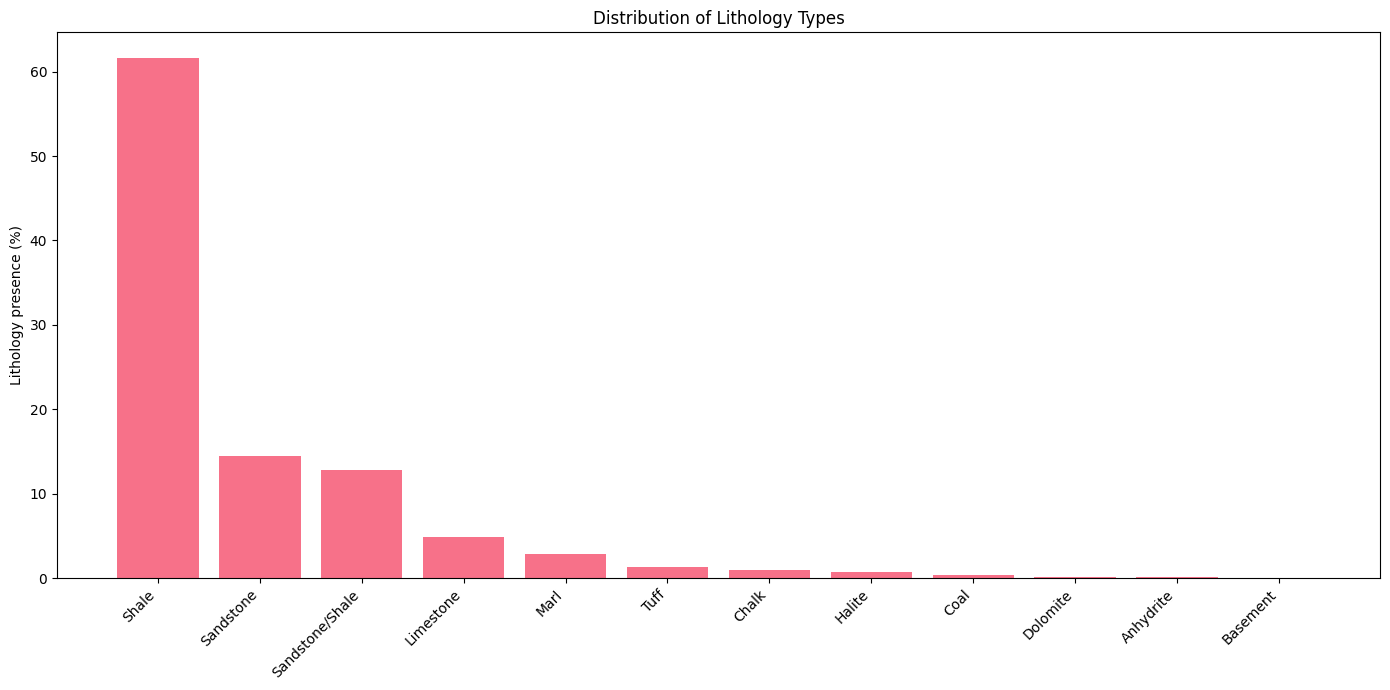

In [70]:
counts = train_raw['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = train_raw['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]

# Use .items() instead of deprecated .iteritems()
for item in counts.items():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
x_positions = np.arange(len(names))

# Create the bar chart
ax.bar(x=x_positions, height=percentage)

# Set tick positions first, then labels
ax.set_xticks(x_positions)
ax.set_xticklabels(names, rotation=45, ha='right')  # ha='right' for better alignment
ax.set_ylabel('Lithology presence (%)')

# Optional: Add some styling improvements
ax.set_title('Distribution of Lithology Types')
plt.tight_layout()  # Prevents label cutoff
plt.show()

Notice that some of the curves are NaN. This is an imporant aspect of this dataset and of this competition. The only log columns that are guaranteed to be present are WELL, DEPT, and GR. All other logs can (and will) be missing from some parts of the dataset.

In [71]:
# Calculate missing values count and percentage
missing_count = train_raw.isna().sum()
total_rows = len(train_raw)
missing_percentage = (missing_count / total_rows) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percentage': missing_percentage
})

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]

# Sort by percentage of missing values (descending)
missing_summary = missing_summary.sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
print("=" * 50)
print(f"Total rows in dataset: {total_rows}")
print("\nColumns with missing values:")
print(missing_summary.round(2))

Missing Values Summary:
Total rows in dataset: 1170511

Columns with missing values:
                                   Missing_Count  Missing_Percentage
SGR                                      1101158               94.07
DTS                                       995898               85.08
RMIC                                      994351               84.95
ROPA                                      978186               83.57
DCAL                                      871678               74.47
MUDWEIGHT                                 854360               72.99
RXO                                       843084               72.03
ROP                                       635440               54.29
RSHA                                      539861               46.12
PEF                                       498819               42.62
BS                                        487854               41.68
NPHI                                      405102               34.61
SP                

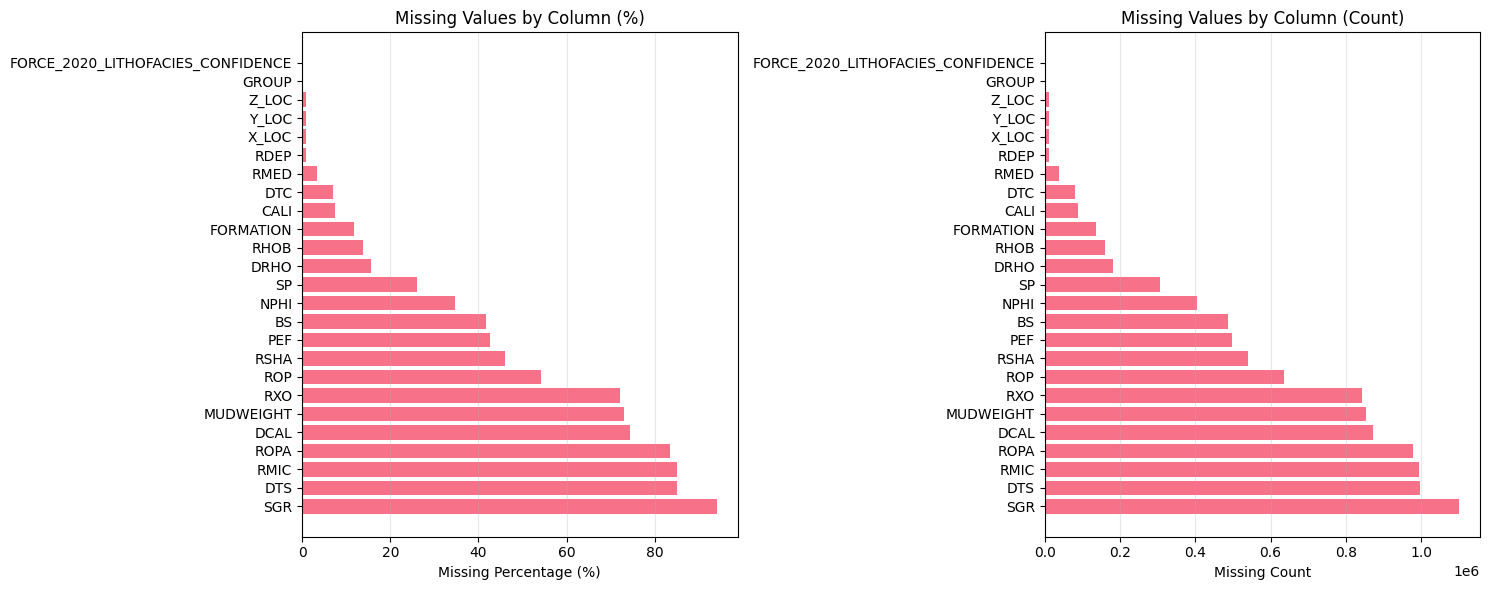

In [72]:
# Optional: Create a visualization
if len(missing_summary) > 0:
    import matplotlib.pyplot as plt

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Bar plot of missing percentages
    ax1.barh(range(len(missing_summary)), missing_summary['Missing_Percentage'])
    ax1.set_yticks(range(len(missing_summary)))
    ax1.set_yticklabels(missing_summary.index, fontsize=10)
    ax1.set_xlabel('Missing Percentage (%)')
    ax1.set_title('Missing Values by Column (%)')
    ax1.grid(axis='x', alpha=0.3)

    # Bar plot of missing counts
    ax2.barh(range(len(missing_summary)), missing_summary['Missing_Count'])
    ax2.set_yticks(range(len(missing_summary)))
    ax2.set_yticklabels(missing_summary.index, fontsize=10)
    ax2.set_xlabel('Missing Count')
    ax2.set_title('Missing Values by Column (Count)')
    ax2.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found in the dataset!")

The following plot shows how large a percentage of training data wells contain at least some depth interval with the given logs. As you can see a couple of logs like RT and DTS are present in less than half of the training wells. **Remember, the test data will have a similar distribution of available logs**

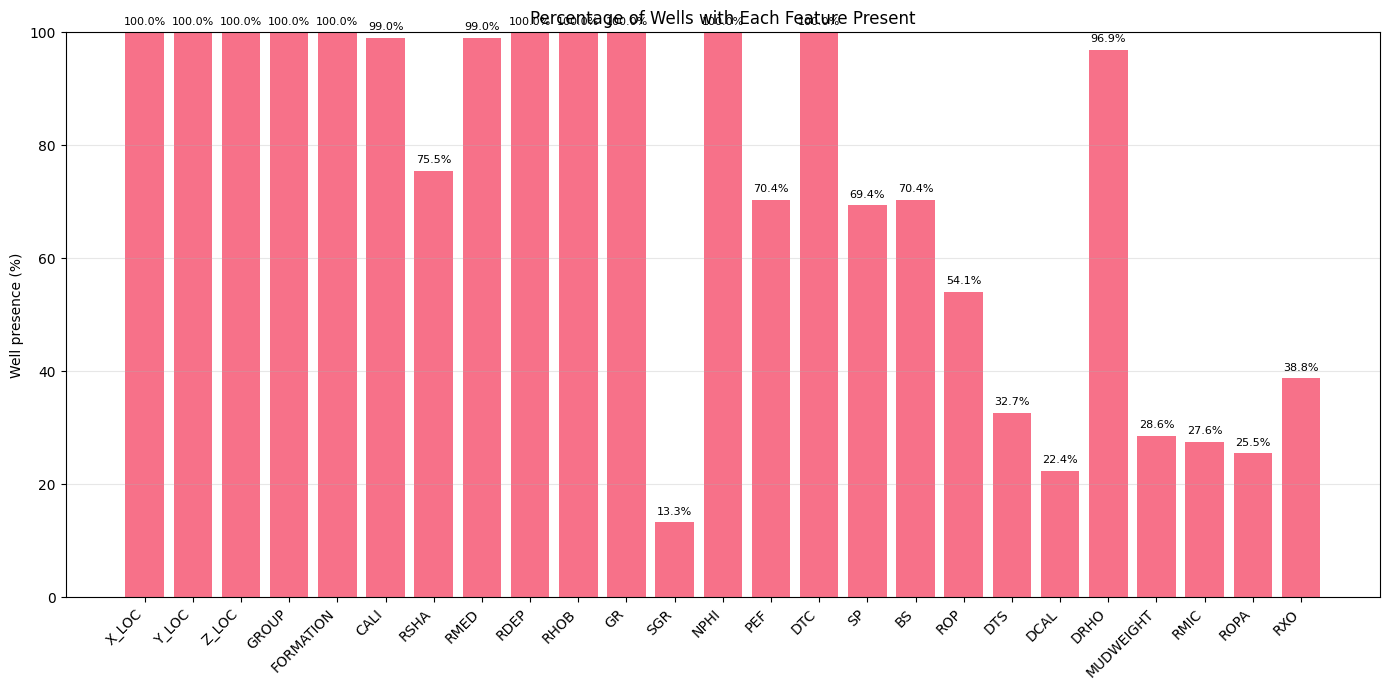

Well Presence Summary:
Total number of wells: 98
Number of features analyzed: 25

Feature presence across wells:
X_LOC: 100.0% of wells
Y_LOC: 100.0% of wells
Z_LOC: 100.0% of wells
GROUP: 100.0% of wells
FORMATION: 100.0% of wells
CALI: 99.0% of wells
RSHA: 75.5% of wells
RMED: 99.0% of wells
RDEP: 100.0% of wells
RHOB: 100.0% of wells
GR: 100.0% of wells
SGR: 13.3% of wells
NPHI: 100.0% of wells
PEF: 70.4% of wells
DTC: 100.0% of wells
SP: 69.4% of wells
BS: 70.4% of wells
ROP: 54.1% of wells
DTS: 32.7% of wells
DCAL: 22.4% of wells
DRHO: 96.9% of wells
MUDWEIGHT: 28.6% of wells
RMIC: 27.6% of wells
ROPA: 25.5% of wells
RXO: 38.8% of wells


In [73]:
# Initialize array to count occurrences of completely missing features per well
num_features = len(train_raw.columns[2:-2])  # Dynamic sizing based on actual columns
occurrences = np.zeros(num_features)

# Count how many wells have each feature completely missing
for well in train_raw['WELL'].unique():
    well_data = train_raw[train_raw['WELL'] == well]
    # Check which features are completely missing (all NaN) in this well
    completely_missing = well_data.iloc[:, 2:-2].isna().all().astype(int).values
    occurrences += completely_missing

# Calculate total number of wells
total_wells = train_raw['WELL'].nunique()

# Calculate percentage of wells that HAVE the feature (not missing)
well_presence_percentage = (total_wells - occurrences) / total_wells * 100.0

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
x_positions = np.arange(len(well_presence_percentage))

# Create bar chart
ax.bar(x=x_positions, height=well_presence_percentage)

# Set labels and ticks
ax.set_xticks(x_positions)
ax.set_xticklabels(train_raw.columns[2:-2], rotation=45, ha='right')
ax.set_ylabel('Well presence (%)')
ax.set_title('Percentage of Wells with Each Feature Present')

# Add some styling
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 100)

# Add value labels on bars (optional)
for i, v in enumerate(well_presence_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Well Presence Summary:")
print("=" * 50)
print(f"Total number of wells: {total_wells}")
print(f"Number of features analyzed: {num_features}")
print("\nFeature presence across wells:")
for i, col in enumerate(train_raw.columns[2:-2]):
    print(f"{col}: {well_presence_percentage[i]:.1f}% of wells")

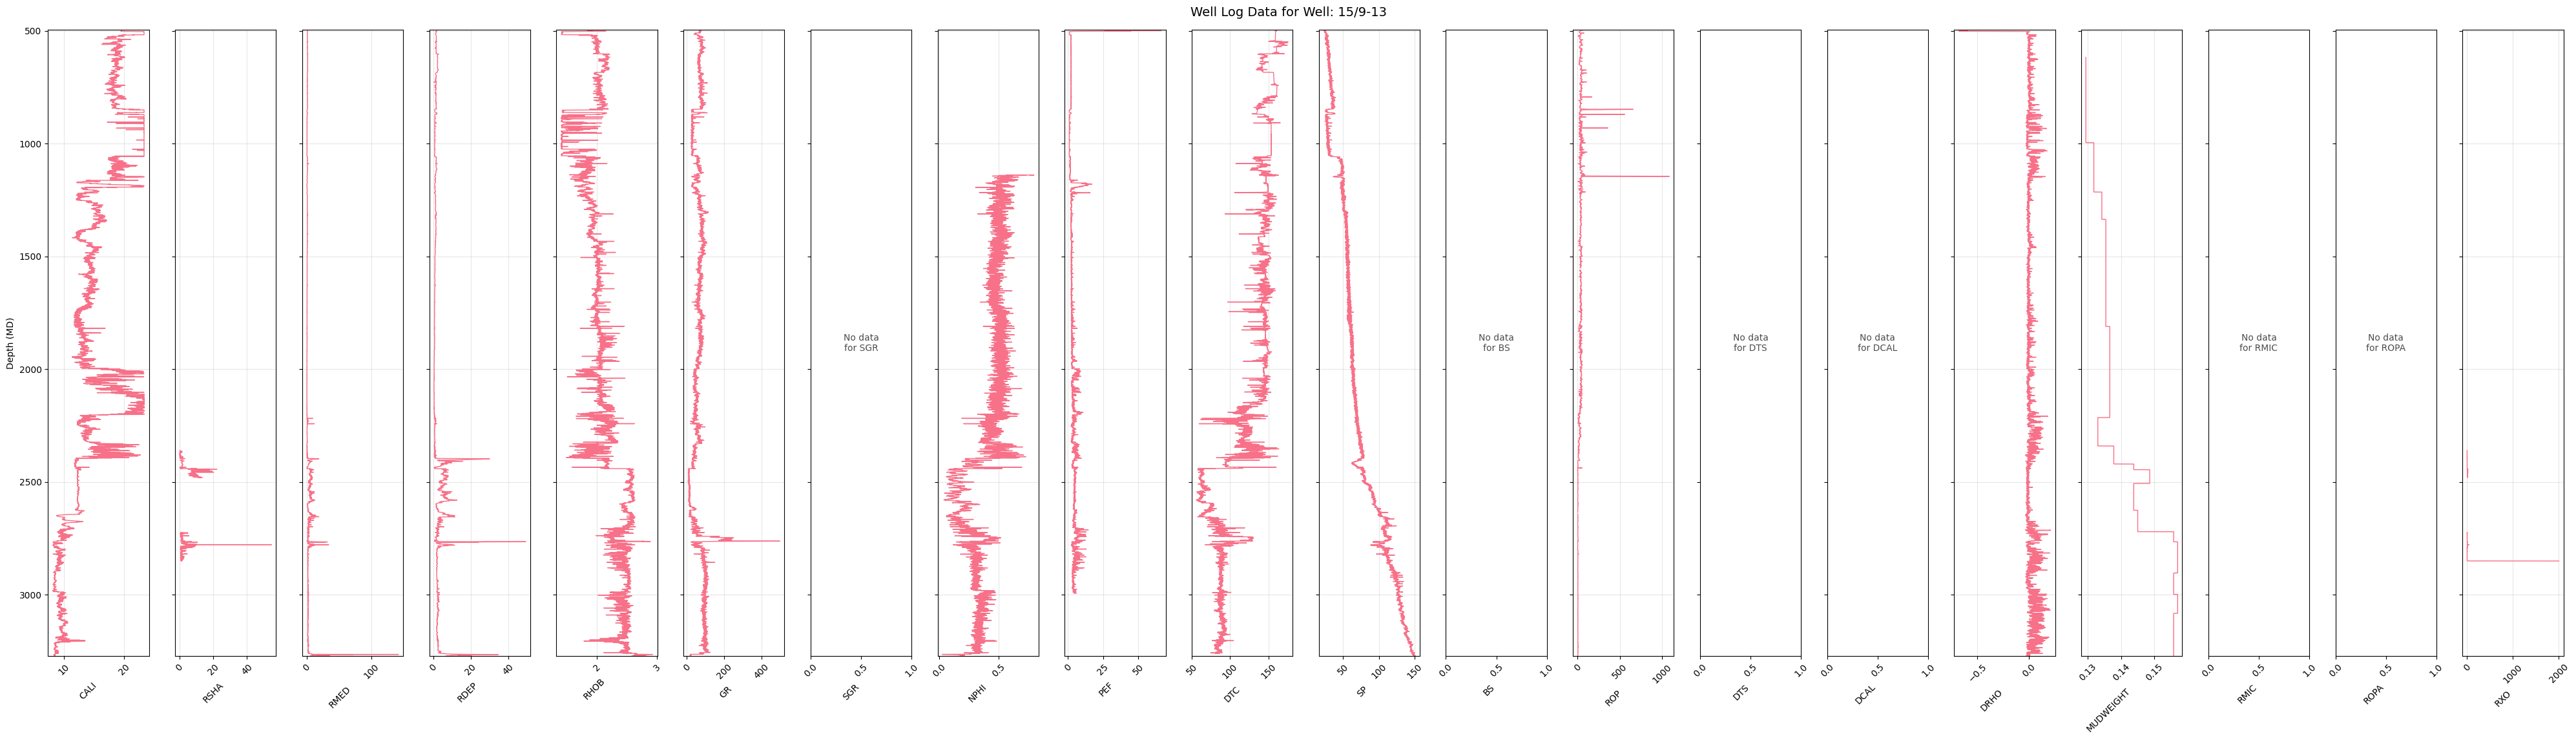

Well: 15/9-13
Depth range: 494.5 - 3272.0
Number of data points: 18270
Available parameters: 20
Parameters plotted: CALI, RSHA, RMED, RDEP, RHOB, GR, SGR, NPHI, PEF, DTC, SP, BS, ROP, DTS, DCAL, DRHO, MUDWEIGHT, RMIC, ROPA, RXO


(<Figure size 4000x1200 with 20 Axes>,
 array([<Axes: xlabel='CALI', ylabel='Depth (MD)'>, <Axes: xlabel='RSHA'>,
        <Axes: xlabel='RMED'>, <Axes: xlabel='RDEP'>,
        <Axes: xlabel='RHOB'>, <Axes: xlabel='GR'>, <Axes: xlabel='SGR'>,
        <Axes: xlabel='NPHI'>, <Axes: xlabel='PEF'>, <Axes: xlabel='DTC'>,
        <Axes: xlabel='SP'>, <Axes: xlabel='BS'>, <Axes: xlabel='ROP'>,
        <Axes: xlabel='DTS'>, <Axes: xlabel='DCAL'>, <Axes: xlabel='DRHO'>,
        <Axes: xlabel='MUDWEIGHT'>, <Axes: xlabel='RMIC'>,
        <Axes: xlabel='ROPA'>, <Axes: xlabel='RXO'>], dtype=object))

In [74]:
def plot_well_logs(data, well_name, figsize=(14, 10)):
    """
    Plot well log data for a specific well.

    Parameters:
    -----------
    data : pandas.DataFrame
        The main dataset containing well data
    well_name : str
        Name of the well to plot
    figsize : tuple, optional
        Figure size (width, height). Default is (14, 10)

    Returns:
    --------
    fig, axs : matplotlib figure and axes objects
    """

    # Check if well exists in data
    if well_name not in train_raw['WELL'].values:
        print(f"Error: Well '{well_name}' not found in dataset.")
        available_wells = data['WELL'].unique()
        print(f"Available wells: {', '.join(available_wells[:10])}...")
        return None, None

    # Select well data
    well_data = train_raw[train_raw['WELL'] == well_name]

    # Define columns to exclude from plotting
    excluded_columns = ['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                       'X_LOC', 'Y_LOC', 'Z_LOC']

    # Get columns to plot (maintaining order)
    plot_columns = [col for col in well_data.columns if col not in excluded_columns]
    num_plots = len(plot_columns)

    if num_plots == 0:
        print(f"No plottable columns found for well '{well_name}'")
        return None, None

    # Create subplots - handle case where there might be only one column
    if num_plots == 1:
        fig, axs = plt.subplots(1, 1, figsize=(6, figsize[1]))
        axs = [axs]  # Make it iterable
    else:
        fig, axs = plt.subplots(1, num_plots, figsize=(max(figsize[0], num_plots*2), figsize[1]), sharey=True)

    # Create plots for each column
    for ic, col in enumerate(plot_columns):
        # Skip columns that are entirely NaN
        if well_data[col].isna().all():
            axs[ic].text(0.5, 0.5, f'No data\nfor {col}', ha='center', va='center',
                         transform=axs[ic].transAxes, fontsize=10, alpha=0.7)
            axs[ic].set_xlabel(col, rotation=45, ha='right')
            continue

        # Plot the well log curve
        axs[ic].plot(well_data[col], well_data['DEPTH_MD'], linewidth=1)
        axs[ic].set_xlabel(col, rotation=45, ha='right')
        axs[ic].grid(True, alpha=0.3)

        # Remove NaN values for better axis scaling
        valid_data = well_data[col].dropna()
        if not valid_data.empty:
            # Set reasonable x-axis limits
            data_range = valid_data.max() - valid_data.min()
            if data_range > 0:
                margin = data_range * 0.05
                axs[ic].set_xlim(valid_data.min() - margin, valid_data.max() + margin)

    # Set depth axis properties (inverted, like typical well logs)
    depth_min = well_data['DEPTH_MD'].min()
    depth_max = well_data['DEPTH_MD'].max()

    for ax in axs:
        ax.set_ylim(depth_max, depth_min)  # Inverted y-axis (depth increases downward)
        ax.tick_params(axis='x', rotation=45)

    # Set y-label only on the first subplot
    axs[0].set_ylabel('Depth (MD)')

    # Add title
    fig.suptitle(f'Well Log Data for Well: {well_name}', fontsize=14, y=0.95)

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Make room for title
    plt.show()

    # Print summary information
    print(f"Well: {well_name}")
    print(f"Depth range: {depth_min:.1f} - {depth_max:.1f}")
    print(f"Number of data points: {len(well_data)}")
    print(f"Available parameters: {len(plot_columns)}")
    print("Parameters plotted:", ', '.join(plot_columns))

    return fig, axs


# Example usage:
# plot_well_logs(data, wells[0])
# plot_well_logs(data, 'WELL_NAME_HERE')
plot_well_logs(train_raw, wells[0], figsize=(16, 12))

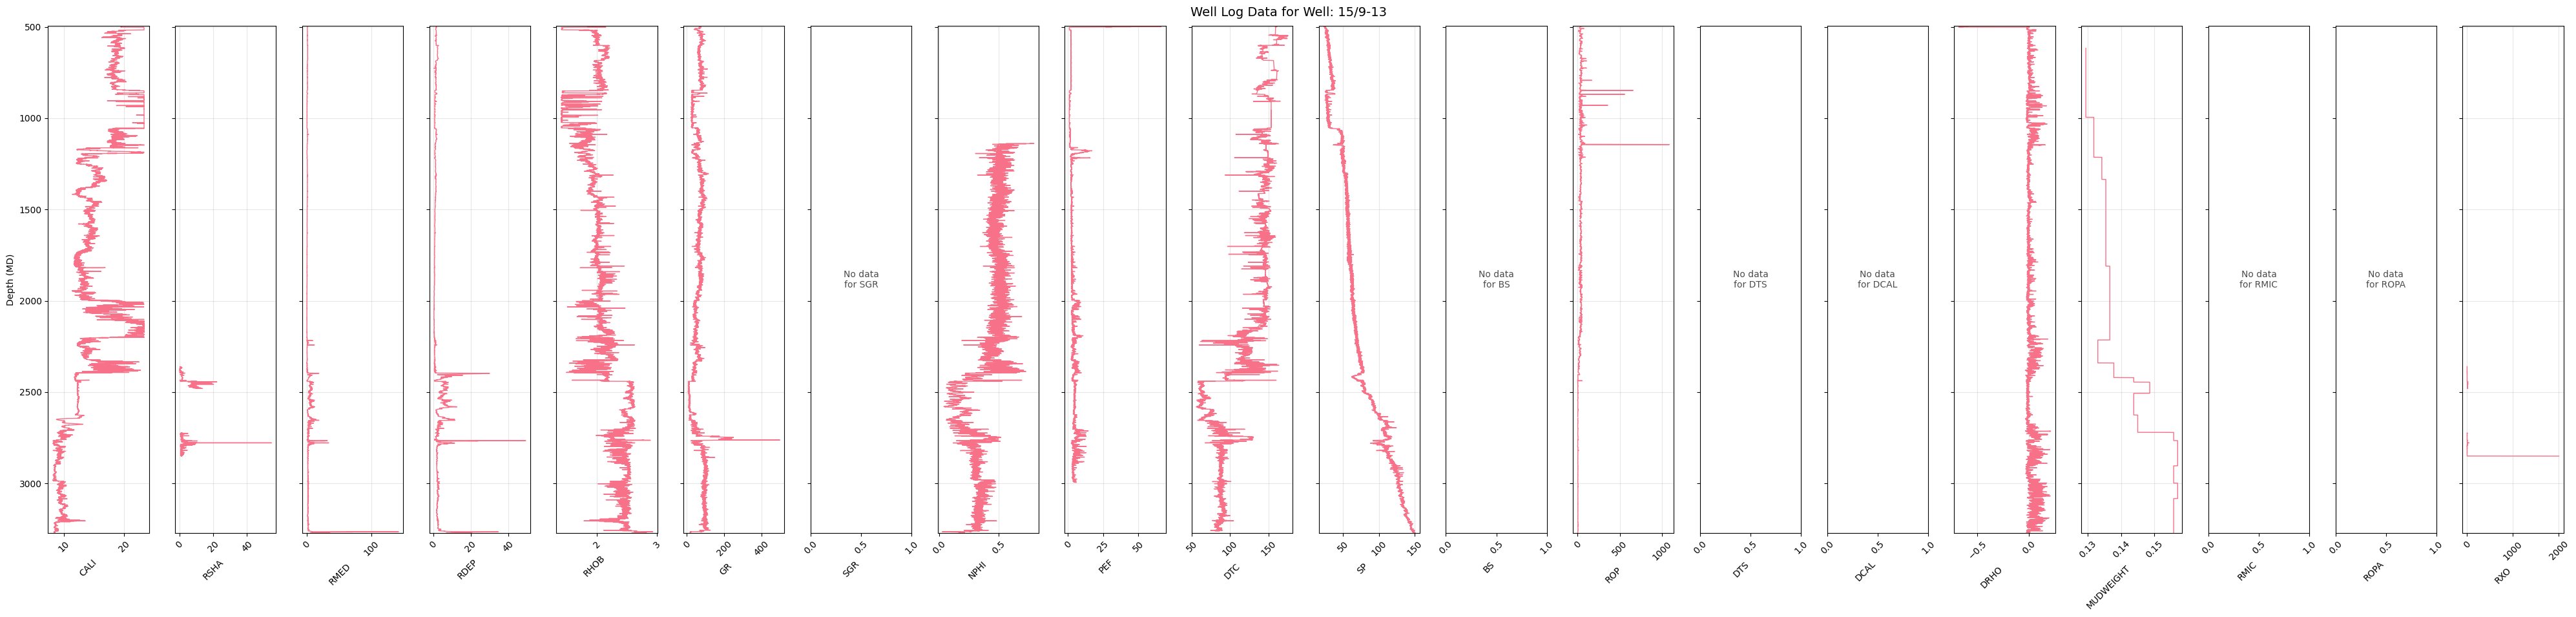

Well: 15/9-13
Depth range: 494.5 - 3272.0
Number of data points: 18270
Available parameters: 20
Parameters plotted: CALI, RSHA, RMED, RDEP, RHOB, GR, SGR, NPHI, PEF, DTC, SP, BS, ROP, DTS, DCAL, DRHO, MUDWEIGHT, RMIC, ROPA, RXO


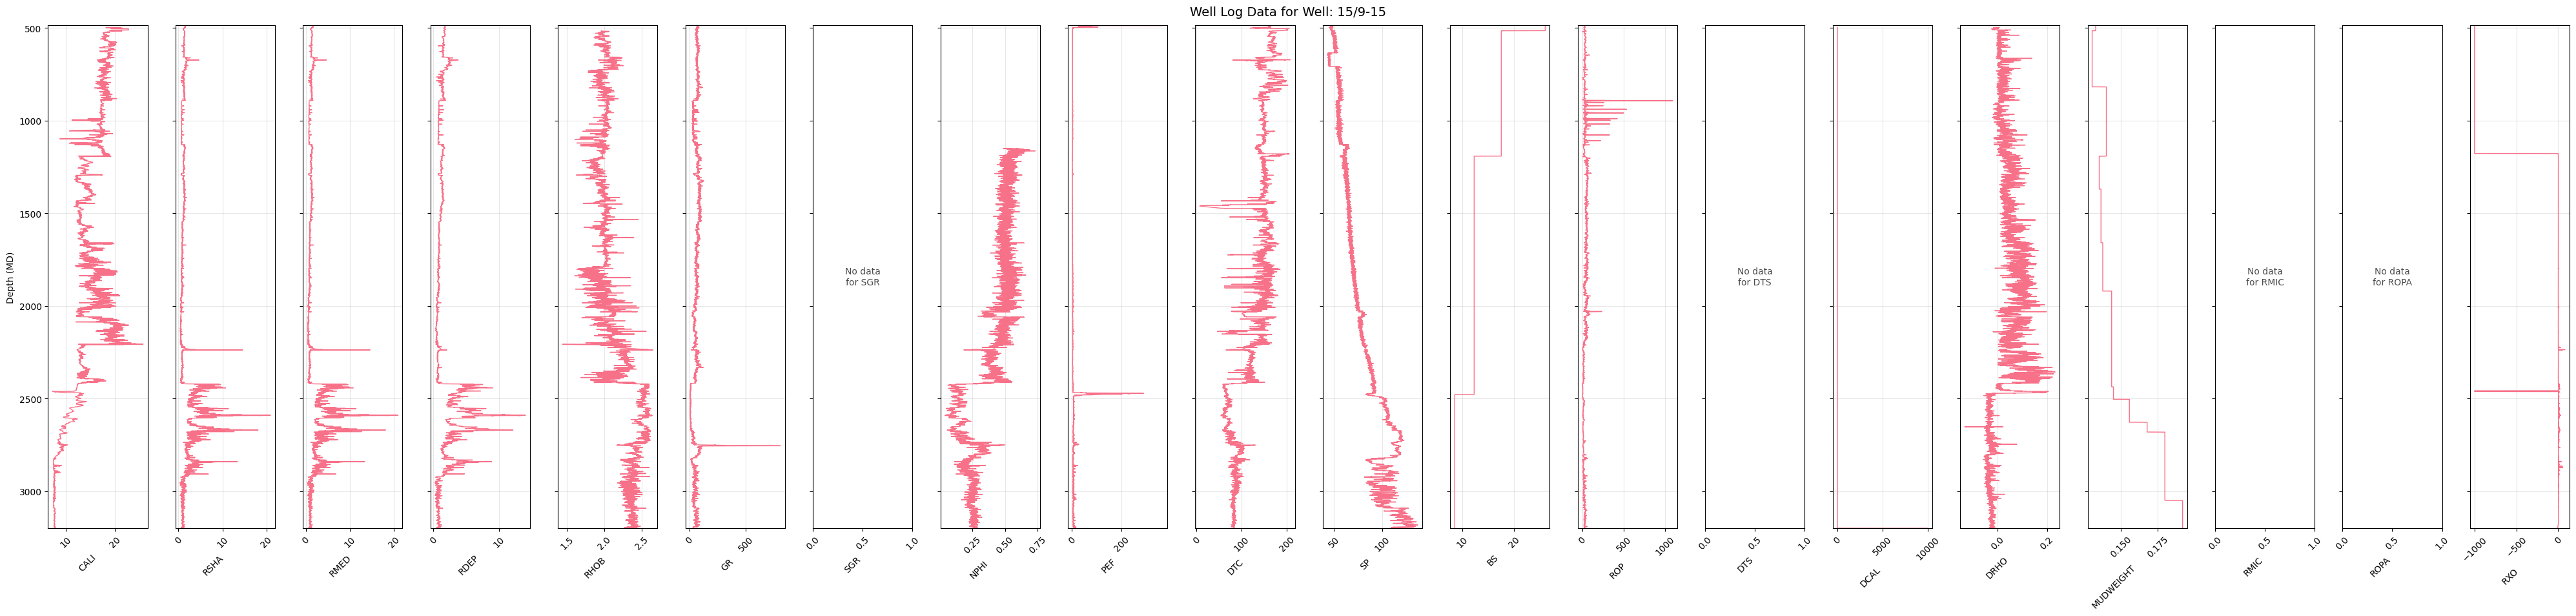

Well: 15/9-15
Depth range: 485.3 - 3200.1
Number of data points: 17717
Available parameters: 20
Parameters plotted: CALI, RSHA, RMED, RDEP, RHOB, GR, SGR, NPHI, PEF, DTC, SP, BS, ROP, DTS, DCAL, DRHO, MUDWEIGHT, RMIC, ROPA, RXO


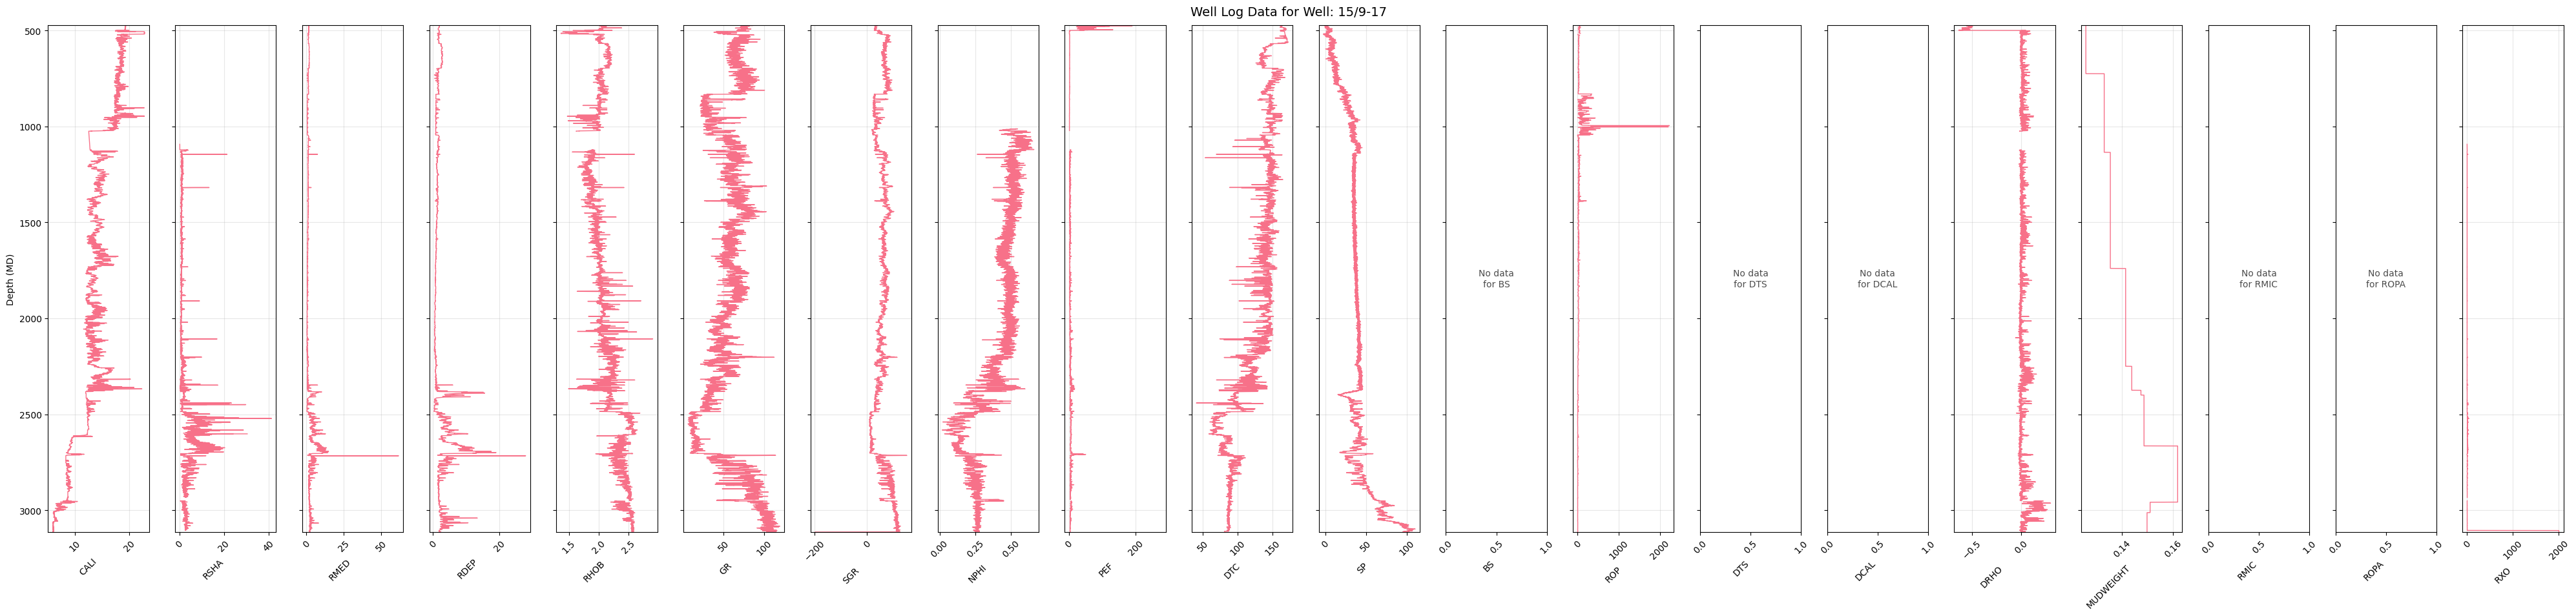

Well: 15/9-17
Depth range: 472.4 - 3114.5
Number of data points: 17350
Available parameters: 20
Parameters plotted: CALI, RSHA, RMED, RDEP, RHOB, GR, SGR, NPHI, PEF, DTC, SP, BS, ROP, DTS, DCAL, DRHO, MUDWEIGHT, RMIC, ROPA, RXO


In [75]:
# To plot multiple wells:
def plot_multiple_wells(data, well_list, figsize=(14, 10)):
    """
    Plot well logs for multiple wells.

    Parameters:
    -----------
    data : pandas.DataFrame
        The main dataset containing well data
    well_list : list
        List of well names to plot
    figsize : tuple, optional
        Figure size for each well plot
    """
    for well in well_list:
        plot_well_logs(data, well, figsize)
        print("=" * 60)  # Separator between wells

# Example usage for multiple wells:
plot_multiple_wells(train_raw, wells[:3])  # Plot first 3 wells

In [76]:
X = train_raw.drop(columns=['WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'])
X.head(2)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.61141,1.798681,...,24.612379,NaN,34.63641,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN
1,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.61807,1.795641,...,23.895531,NaN,34.63641,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN


In [77]:
X.fillna(0, inplace=True)
# X.isna().sum()

In [78]:
y = train_raw['FORCE_2020_LITHOFACIES_LITHOLOGY']
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

In [79]:
y = y.map(lithology_numbers)

##### Lithologies are not equally likely. Probably smart to take this into account by computing class weights

In [80]:
np.bincount(y)

array([168937, 150455, 720803,  33329,   1688,  56320,  10513,   8213,
         1085,  15245,   3820,    103])

In [81]:
def analyze_missing_values(data, threshold_drop=80):
    """Analyze missing values and suggest features to drop"""
    print("=== MISSING VALUES ANALYSIS ===")

    missing_count = data.isna().sum()
    total_rows = len(data)
    missing_percentage = (missing_count / total_rows) * 100

    missing_summary = pd.DataFrame({
        'Missing_Count': missing_count,
        'Missing_Percentage': missing_percentage
    })

    missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
    missing_summary = missing_summary.sort_values('Missing_Percentage', ascending=False)

    print(f"Total rows: {total_rows}")
    print("\nMissing values summary:")
    print(missing_summary.round(2))

    # Suggest features to drop
    features_to_drop = missing_summary[missing_summary['Missing_Percentage'] > threshold_drop].index.tolist()
    print(f"\nSuggested features to DROP (>{threshold_drop}% missing): {features_to_drop}")

    # Plot missing values
    if len(missing_summary) > 0:
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(missing_summary)), missing_summary['Missing_Percentage'])
        plt.yticks(range(len(missing_summary)), missing_summary.index)
        plt.xlabel('Missing Percentage (%)')
        plt.title('Missing Values by Feature')
        plt.grid(axis='x', alpha=0.3)

        # Add threshold line
        plt.axvline(x=threshold_drop, color='red', linestyle='--',
                   label=f'{threshold_drop}% threshold')
        plt.legend()
        plt.tight_layout()
        plt.show()

    return features_to_drop, missing_summary

=== MISSING VALUES ANALYSIS ===
Total rows: 1170511

Missing values summary:
                                   Missing_Count  Missing_Percentage
SGR                                      1101158               94.07
DTS                                       995898               85.08
RMIC                                      994351               84.95
ROPA                                      978186               83.57
DCAL                                      871678               74.47
MUDWEIGHT                                 854360               72.99
RXO                                       843084               72.03
ROP                                       635440               54.29
RSHA                                      539861               46.12
PEF                                       498819               42.62
BS                                        487854               41.68
NPHI                                      405102               34.61
SP                        

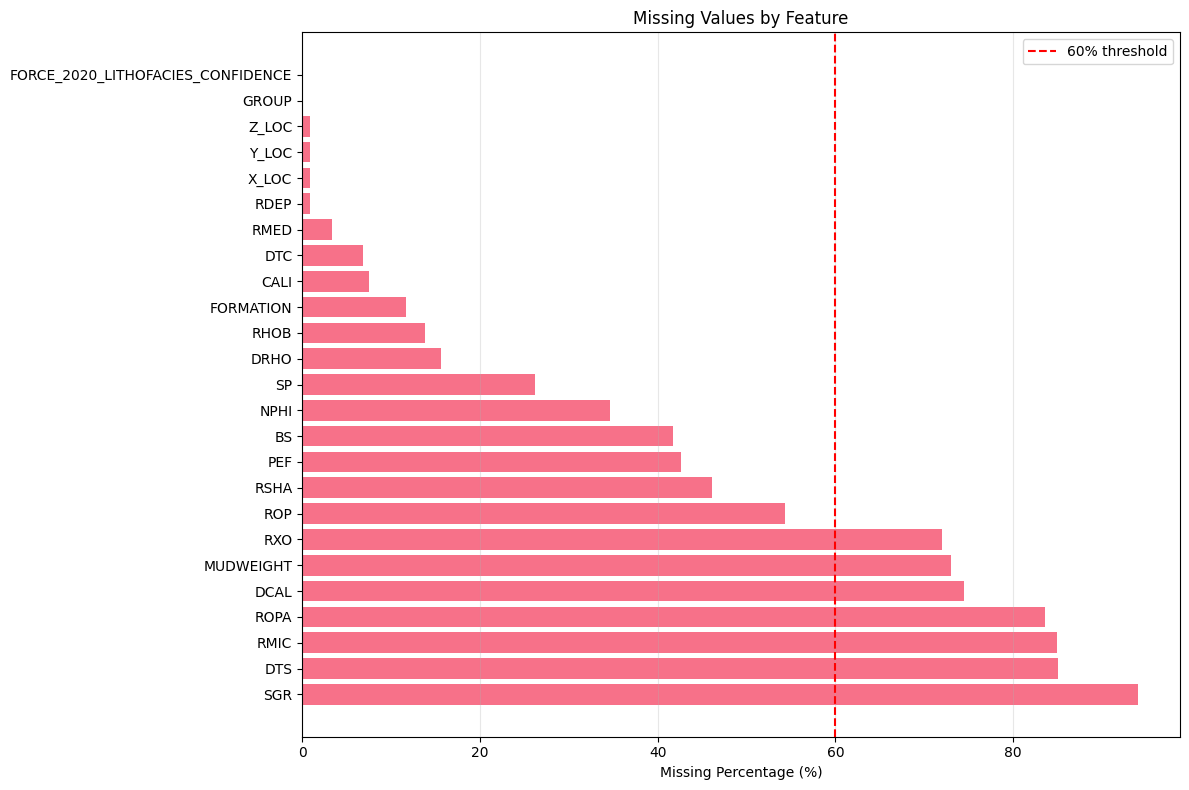

In [82]:
features_to_drop, missing_summary = analyze_missing_values(train_raw, threshold_drop=60)

In [83]:
def plot_lithology_distribution(data, lithology_keys):
    """Plot distribution of lithology classes"""
    print("=== LITHOLOGY DISTRIBUTION ===")

    target_col = 'FORCE_2020_LITHOFACIES_LITHOLOGY'
    counts = data[target_col].value_counts()

    names = [lithology_keys[code] for code in counts.index]
    percentages = (counts.values / len(data)) * 100

    plt.figure(figsize=(14, 8))
    bars = plt.bar(names, percentages, color=plt.cm.Set3(np.arange(len(names))))
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Percentage (%)')
    plt.title('Distribution of Lithology Classes')

    # Add percentage labels on bars
    for bar, pct in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{pct:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Print class imbalance info
    print("Class distribution:")
    for code, count in counts.items():
        print(f"{lithology_keys[code]}: {count} ({count/len(data)*100:.1f}%)")

    return counts

=== LITHOLOGY DISTRIBUTION ===


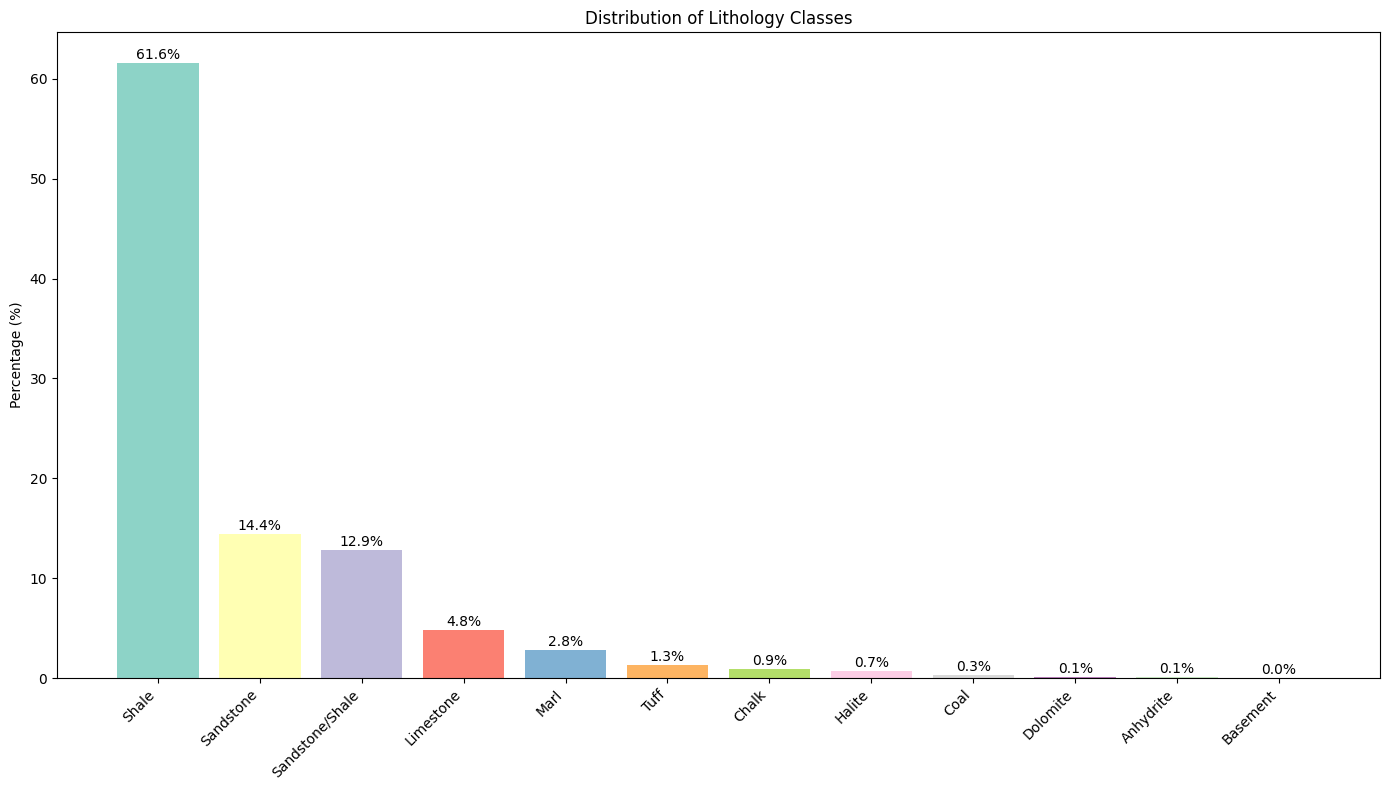

Class distribution:
Shale: 720803 (61.6%)
Sandstone: 168937 (14.4%)
Sandstone/Shale: 150455 (12.9%)
Limestone: 56320 (4.8%)
Marl: 33329 (2.8%)
Tuff: 15245 (1.3%)
Chalk: 10513 (0.9%)
Halite: 8213 (0.7%)
Coal: 3820 (0.3%)
Dolomite: 1688 (0.1%)
Anhydrite: 1085 (0.1%)
Basement: 103 (0.0%)


In [84]:
lithology_counts = plot_lithology_distribution(train_raw, lithology_keys)

In [85]:
def plot_well_coverage(data):
    """Analyze feature availability across wells"""
    print("=== WELL COVERAGE ANALYSIS ===")

    # Features to analyze (exclude metadata and target)
    feature_cols = [col for col in data.columns
                   if col not in ['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC',
                                 'GROUP', 'FORMATION', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                 'FORCE_2020_LITHOFACIES_CONFIDENCE']]

    wells = data['WELL'].unique()
    well_coverage = {}

    for feature in feature_cols:
        wells_with_feature = 0
        for well in wells:
            well_data = data[data['WELL'] == well]
            if not well_data[feature].isna().all():
                wells_with_feature += 1
        well_coverage[feature] = (wells_with_feature / len(wells)) * 100

    # Plot coverage
    coverage_df = pd.DataFrame(list(well_coverage.items()),
                              columns=['Feature', 'Well_Coverage_Pct'])
    coverage_df = coverage_df.sort_values('Well_Coverage_Pct', ascending=True)

    plt.figure(figsize=(12, 10))
    plt.barh(coverage_df['Feature'], coverage_df['Well_Coverage_Pct'])
    plt.xlabel('Percentage of Wells with Feature (%)')
    plt.title('Feature Availability Across Wells')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return well_coverage

=== WELL COVERAGE ANALYSIS ===


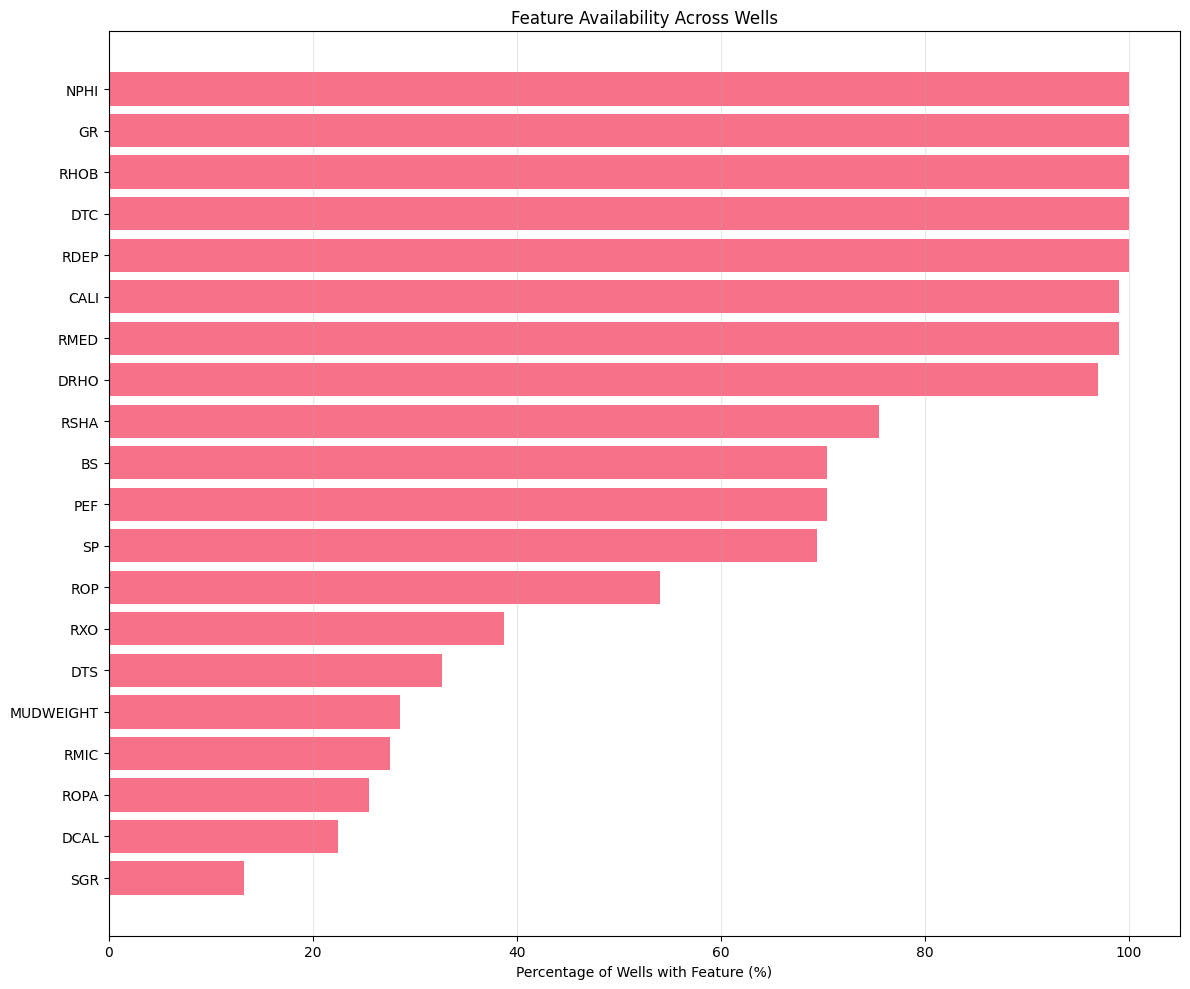

In [86]:
well_coverage = plot_well_coverage(train_raw)

In [87]:
def preprocess_data(data, features_to_drop=None, fill_strategy='median'):
    """Comprehensive data preprocessing"""
    print("=== DATA PREPROCESSING ===")

    # Create a copy
    processed_data = data.copy()

    # Drop high-missing features
    if features_to_drop:
        print(f"Dropping features: {features_to_drop}")
        processed_data = processed_data.drop(columns=features_to_drop, errors='ignore')

    # Handle categorical features
    categorical_features = ['GROUP', 'FORMATION']
    for feature in categorical_features:
        if feature in processed_data.columns:
            # Fill missing with 'Unknown'
            processed_data[feature] = processed_data[feature].fillna('Unknown')
            # Label encode
            le = LabelEncoder()
            processed_data[feature] = le.fit_transform(processed_data[feature])
            print(f"Encoded {feature}: {len(le.classes_)} unique values")

    # Handle numerical features
    numerical_features = [col for col in processed_data.columns
                         if col not in ['WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                                       'FORCE_2020_LITHOFACIES_CONFIDENCE'] + categorical_features]

    for feature in numerical_features:
        if processed_data[feature].isna().sum() > 0:
            if fill_strategy == 'median':
                fill_value = processed_data[feature].median()
            elif fill_strategy == 'mean':
                fill_value = processed_data[feature].mean()
            else:  # zero
                fill_value = 0

            processed_data[feature] = processed_data[feature].fillna(fill_value)

    print(f"Filled missing values using {fill_strategy} strategy")
    print(f"Remaining missing values: {processed_data.isna().sum().sum()}")

    return processed_data

In [88]:
processed_data = preprocess_data(train_raw, features_to_drop, fill_strategy='median')

=== DATA PREPROCESSING ===
Dropping features: ['SGR', 'DTS', 'RMIC', 'ROPA', 'DCAL', 'MUDWEIGHT', 'RXO']
Encoded GROUP: 15 unique values
Encoded FORMATION: 70 unique values
Filled missing values using median strategy
Remaining missing values: 179


In [89]:
def engineer_features(data):
    """Create new features from existing well log data"""
    print("=== FEATURE ENGINEERING ===")

    engineered_data = data.copy()

    # Geological ratios and combinations
    if 'RHOB' in data.columns and 'NPHI' in data.columns:
        engineered_data['RHOB_NPHI_RATIO'] = data['RHOB'] / (data['NPHI'] + 1e-6)
        print("Created RHOB/NPHI ratio")

    if 'RDEP' in data.columns and 'RMED' in data.columns:
        engineered_data['RESISTIVITY_RATIO'] = data['RDEP'] / (data['RMED'] + 1e-6)
        print("Created deep/medium resistivity ratio")

    if 'GR' in data.columns:
        engineered_data['GR_NORMALIZED'] = (data['GR'] - data['GR'].mean()) / data['GR'].std()
        print("Created normalized GR")

    # Porosity-density combination
    if 'RHOB' in data.columns and 'NPHI' in data.columns:
        engineered_data['POROSITY_DENSITY_INDEX'] = data['NPHI'] * data['RHOB']
        print("Created porosity-density index")

    # Depth-based features
    if 'DEPTH_MD' in data.columns:
        engineered_data['DEPTH_NORM'] = (data['DEPTH_MD'] - data['DEPTH_MD'].min()) / (data['DEPTH_MD'].max() - data['DEPTH_MD'].min())
        print("Created normalized depth")

    # Well-based statistical features
    if 'WELL' in data.columns and 'GR' in data.columns:
        well_gr_stats = data.groupby('WELL')['GR'].agg(['mean', 'std']).reset_index()
        well_gr_stats.columns = ['WELL', 'WELL_GR_MEAN', 'WELL_GR_STD']
        engineered_data = engineered_data.merge(well_gr_stats, on='WELL', how='left')
        engineered_data['GR_WELL_DEVIATION'] = data['GR'] - engineered_data['WELL_GR_MEAN']
        print("Created well-based GR statistics")

    print(f"Original features: {data.shape[1]}")
    print(f"Features after engineering: {engineered_data.shape[1]}")

    return engineered_data

In [90]:
engineered_data = engineer_features(processed_data)

=== FEATURE ENGINEERING ===
Created RHOB/NPHI ratio
Created deep/medium resistivity ratio
Created normalized GR
Created porosity-density index
Created normalized depth
Created well-based GR statistics
Original features: 22
Features after engineering: 30


In [91]:
def prepare_training_data(data):
    """Prepare features and target for modeling"""
    print("=== PREPARING TRAINING DATA ===")

    # Define features to exclude
    exclude_features = ['WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE']

    # Features and target
    X = data.drop(columns=exclude_features, errors='ignore')
    y = data['FORCE_2020_LITHOFACIES_LITHOLOGY']

    # Encode target labels to 0-11
    lithology_numbers = {30000: 0, 65030: 1, 65000: 2, 80000: 3, 74000: 4, 70000: 5,
                        70032: 6, 88000: 7, 86000: 8, 99000: 9, 90000: 10, 93000: 11}
    y = y.map(lithology_numbers)

    print(f"Feature matrix shape: {X.shape}")
    print(f"Target vector shape: {y.shape}")
    print(f"Feature columns: {list(X.columns)}")

    return X, y

In [92]:
X, y = prepare_training_data(engineered_data)

=== PREPARING TRAINING DATA ===
Feature matrix shape: (1170511, 27)
Target vector shape: (1170511,)
Feature columns: ['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DRHO', 'RHOB_NPHI_RATIO', 'RESISTIVITY_RATIO', 'GR_NORMALIZED', 'POROSITY_DENSITY_INDEX', 'DEPTH_NORM', 'WELL_GR_MEAN', 'WELL_GR_STD', 'GR_WELL_DEVIATION']


In [96]:
def train_baseline_models(X, y):
    """Train and evaluate baseline models"""
    print("=== TRAINING BASELINE MODELS ===")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=42, stratify=y)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Calculate class weights for imbalanced data
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))

    # Define models
    models = {
        'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Use scaled data for logistic regression, original for tree-based
        if 'Logistic' in name:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            # Cross-validation
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

        # Evaluate
        test_accuracy = accuracy_score(y_test, y_pred)
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()

        results[name] = {
            'model': model,
            'test_accuracy': test_accuracy,
            'cv_mean': cv_mean,
            'cv_std': cv_std,
            'predictions': y_pred
        }

        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"CV Accuracy: {cv_mean:.4f} (+/- {cv_std*2:.4f})")

    return results, X_test, y_test, scaler

In [ ]:
results, X_test, y_test, scaler = train_baseline_models(X, y)

=== TRAINING BASELINE MODELS ===

Training Logistic Regression...
Test Accuracy: 0.5154
CV Accuracy: 0.5168 (+/- 0.0015)

Training Random Forest...


In [94]:
def evaluate_model_performance(results, X_test, y_test, lithology_keys):
    """Detailed model evaluation"""
    print("=== MODEL EVALUATION ===")

    # Compare models
    comparison_df = pd.DataFrame({
        'Model': list(results.keys()),
        'Test_Accuracy': [results[name]['test_accuracy'] for name in results.keys()],
        'CV_Mean': [results[name]['cv_mean'] for name in results.keys()],
        'CV_Std': [results[name]['cv_std'] for name in results.keys()]
    })

    comparison_df = comparison_df.sort_values('Test_Accuracy', ascending=False)
    print("\nModel Comparison:")
    print(comparison_df.round(4))

    # Plot comparison
    plt.figure(figsize=(12, 6))
    x_pos = np.arange(len(comparison_df))

    plt.bar(x_pos, comparison_df['Test_Accuracy'], alpha=0.7, label='Test Accuracy')
    plt.bar(x_pos, comparison_df['CV_Mean'], alpha=0.7, label='CV Mean')

    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Performance Comparison')
    plt.xticks(x_pos, comparison_df['Model'], rotation=45)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Detailed evaluation of best model
    best_model_name = comparison_df.iloc[0]['Model']
    best_model = results[best_model_name]['model']
    y_pred_best = results[best_model_name]['predictions']

    print(f"\n=== DETAILED EVALUATION: {best_model_name} ===")

    # Classification report
    target_names = [lithology_keys[code] for code in sorted(lithology_keys.keys())]
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_best, target_names=target_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_best)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return best_model, best_model_name

In [95]:
 best_model, best_model_name = evaluate_model_performance(results, X_test, y_test, lithology_keys)

NameError: name 'results' is not defined

In [ ]:
def optimize_best_model(X, y, model_type='RandomForest'):
    """Hyperparameter optimization for the best model"""
    print("=== MODEL OPTIMIZATION ===")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=42, stratify=y)

    if model_type == 'RandomForest':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        base_model = RandomForestClassifier(class_weight='balanced', random_state=42)

    elif model_type == 'GradientBoosting':
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1, 0.15],
            'max_depth': [3, 5, 7]
        }
        base_model = GradientBoostingClassifier(random_state=42)

    print(f"Optimizing {model_type} with grid search...")
    print(f"Parameter grid: {param_grid}")

    # Grid search with cross-validation
    grid_search = GridSearchCV(base_model, param_grid, cv=3, scoring='accuracy',
                              n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Best model
    best_model = grid_search.best_estimator_
    y_pred_optimized = best_model.predict(X_test)

    print(f"\nBest parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    print(f"Test accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")

    return best_model, grid_search.best_params_

In [ ]:
# 8. Optimize best model
    if 'Random Forest' in best_model_name:
        optimized_model, best_params = optimize_best_model(X, y, 'RandomForest')
    else:
        optimized_model, best_params = optimize_best_model(X, y, 'GradientBoosting')

    print("\n=== PIPELINE COMPLETED ===")
    print(f"Best model: {best_model_name}")
    print(f"Optimized parameters: {best_params}")